In [280]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [281]:
df = pd.read_csv("proc.csv", index_col=0)

C:\Users\maxim\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5,7,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [282]:
#drop the row index
#df = df.drop(df.columns[0])

In [283]:
df["date"] = list(map(lambda s: s[:-3] + s[-2:], df["date"]))
df = df.drop(df[df["date"]=="dte"].index) # BUG? For some reason some date colums contain the value "dte"
df["date"] = pd.to_datetime(df["date"])
df = df.reset_index()

In [284]:
df

,index,cat,username,text,date,geo,hashtags,tweet_id,mentions,permalink,...,nrc_fear,nrc_anger,nrc_anticipation,nrc_trust,nrc_surprise,nrc_positive,nrc_negative,nrc_sadness,nrc_disgust,nrc_joy
0,2,before_pandemic,1baldchick,gab has loads of side effects. i always try to...,2020-02-28 19:44:18+00:00,NaN,NaN,1233478047212408834,NaN,https://twitter.com/1baldchick/status/12334780...,...,0.100000,0.100000,0.106250,0.093750,0.100000,0.100000,0.100000,0.106250,0.100000,0.093750
1,3,before_pandemic,1baldchick,happy friday to u good sir!! and to your littl...,2020-02-28 19:42:32+00:00,NaN,NaN,1233477603866050560,NaN,https://twitter.com/1baldchick/status/12334776...,...,0.108108,0.108108,0.108108,0.108108,0.081081,0.081081,0.108108,0.108108,0.081081,0.108108
2,4,before_pandemic,1baldchick,this song says it all!,2020-02-28 08:34:04+00:00,NaN,NaN,1233309379497283584,NaN,https://twitter.com/1baldchick/status/12333093...,...,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.125000,0.000000,0.125000
3,5,before_pandemic,1baldchick,"it has constipation actually listed, cuz emgal...",2020-02-28 08:17:38+00:00,NaN,NaN,1233305242604908545,NaN,https://twitter.com/1baldchick/status/12333052...,...,0.111111,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765
4,6,before_pandemic,1baldchick,"oh i dont know. it has a grimace of pain, a we...",2020-02-28 08:16:07+00:00,NaN,NaN,1233304863494283264,NaN,https://twitter.com/1baldchick/status/12333048...,...,0.098266,0.092486,0.115607,0.104046,0.092486,0.098266,0.104046,0.104046,0.098266,0.092486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227517,270,since_pandemic,_tomdalton,total bullshit narrative.,2020-03-07 03:27:53+00:00,NaN,NaN,1236131428892651520,NaN,https://twitter.com/_tomdalton/status/12361314...,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
227518,271,since_pandemic,_tomdalton,doctors are not always right either and many w...,2020-03-05 23:36:05+00:00,NaN,NaN,1235710707993374721,NaN,https://twitter.com/_tomdalton/status/12357107...,...,0.098592,0.084507,0.098592,0.098592,0.112676,0.084507,0.112676,0.126761,0.084507,0.098592
227519,272,since_pandemic,_tomdalton,yes x1000,2020-03-05 18:57:13+00:00,NaN,NaN,1235640525740552192,NaN,https://twitter.com/_tomdalton/status/12356405...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
227520,273,since_pandemic,_tomdalton,very important thread. already hearing the anx...,2020-03-05 18:55:54+00:00,NaN,NaN,1235640197926264832,@MorganGodvin,https://twitter.com/_tomdalton/status/12356401...,...,0.116279,0.116279,0.116279,0.046512,0.116279,0.093023,0.116279,0.093023,0.069767,0.116279


In [285]:
df["count"]=1

In [370]:
resamp10D = df.resample("1d", on="date").mean()
resamp10D

,index,sent,nrc_fear,nrc_anger,nrc_anticipation,nrc_trust,nrc_surprise,nrc_positive,nrc_negative,nrc_sadness,nrc_disgust,nrc_joy,count
date,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,3369.556553,0.107274,0.088910,0.087264,0.103173,0.085544,0.083058,0.085354,0.092289,0.104653,0.082501,0.086716,1.0
2019-10-02 00:00:00+00:00,3302.546490,0.057523,0.091269,0.092050,0.106703,0.087062,0.089813,0.092612,0.097394,0.106701,0.085151,0.090524,1.0
2019-10-03 00:00:00+00:00,3086.784483,0.138634,0.092859,0.086528,0.101292,0.084335,0.084517,0.087712,0.091743,0.103005,0.081610,0.087260,1.0
2019-10-04 00:00:00+00:00,3430.898477,0.097210,0.091841,0.091435,0.104137,0.089235,0.088591,0.089516,0.093597,0.104530,0.084127,0.091927,1.0
2019-10-05 00:00:00+00:00,3512.186087,0.146931,0.094338,0.092888,0.108340,0.090319,0.088201,0.092744,0.098310,0.105950,0.084637,0.090360,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26 00:00:00+00:00,467.823789,0.058257,0.091656,0.091307,0.107303,0.088527,0.089346,0.092268,0.094838,0.108459,0.085318,0.090406,1.0
2020-07-27 00:00:00+00:00,490.864307,0.026499,0.091818,0.092054,0.107074,0.089201,0.090504,0.092795,0.098574,0.110402,0.085433,0.090524,1.0
2020-07-28 00:00:00+00:00,687.819113,0.015140,0.090574,0.089703,0.102093,0.088782,0.089589,0.089985,0.096595,0.105792,0.085297,0.088780,1.0


In [371]:
df["date"].min()

Timestamp('2019-10-01 00:00:44+0000', tz='UTC')

In [372]:
resamp10D[["sent"]].to_csv("raw_1day.csv")

In [373]:
pandemicStart = df[df["cat"]=="since_pandemic"]["date"].min()
pandemicStart

Timestamp('2020-03-01 00:00:37+0000', tz='UTC')

In [374]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [375]:
resamp10D[["sent"]].rolling(5).mean().to_csv("raw_sent_v_time_5d.csv")

<AxesSubplot:title={'center':'Sentiment vs Time (All, 5D avg.)'}, xlabel='date', ylabel='intensity (sentiment)'>

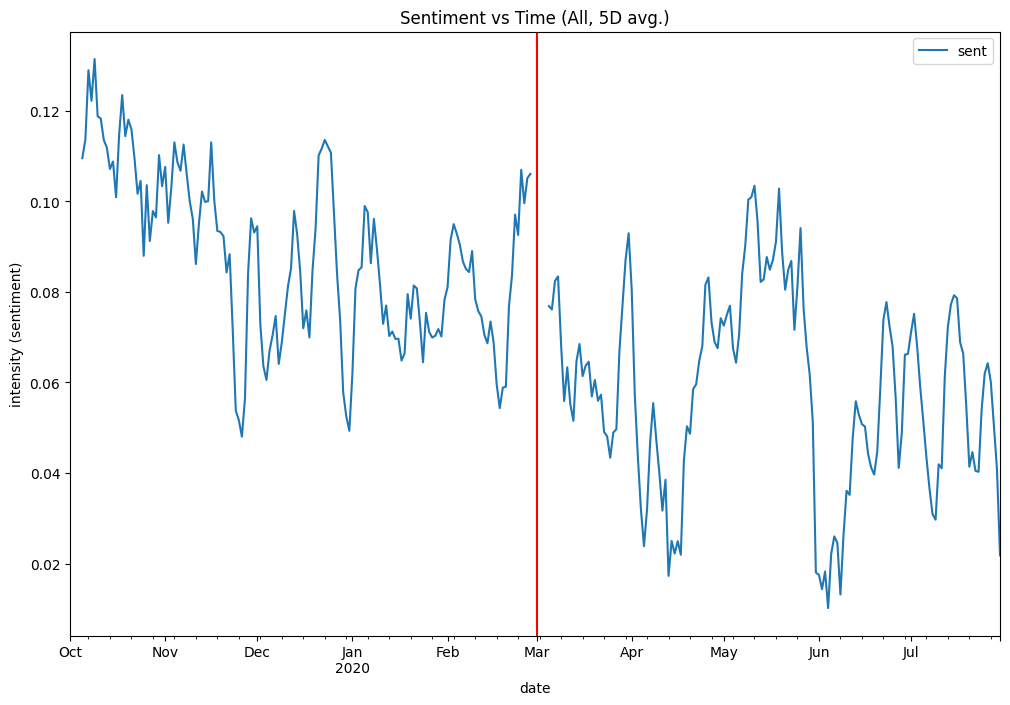

In [376]:
ax = resamp10D[["sent"]].rolling(5).mean().plot(ylabel="intensity (sentiment)", title="Sentiment vs Time (All, 5D avg.)")
ax.axvline(pandemicStart, 0., 1., color="red")
ax.get_figure().savefig("sentiment.png",facecolor="white")
ax

<AxesSubplot:xlabel='date'>

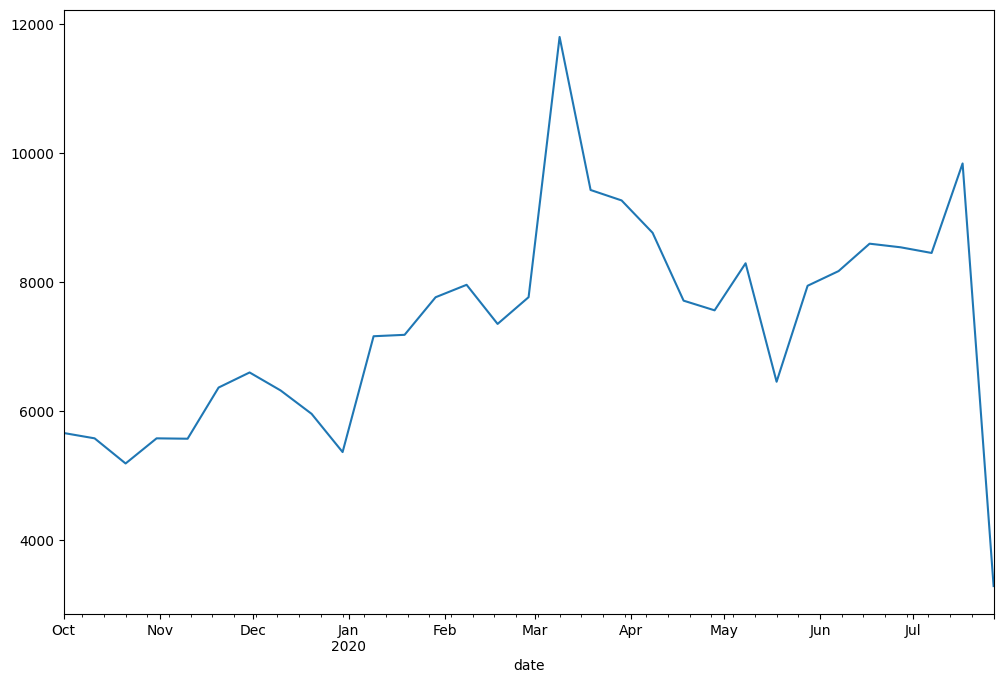

In [377]:
df.resample("10d", on="date").sum()["count"].plot()

<AxesSubplot:title={'center':'NRC Emolex classes vs Time (All, 10D avg.)'}, xlabel='date', ylabel='percent intensity'>

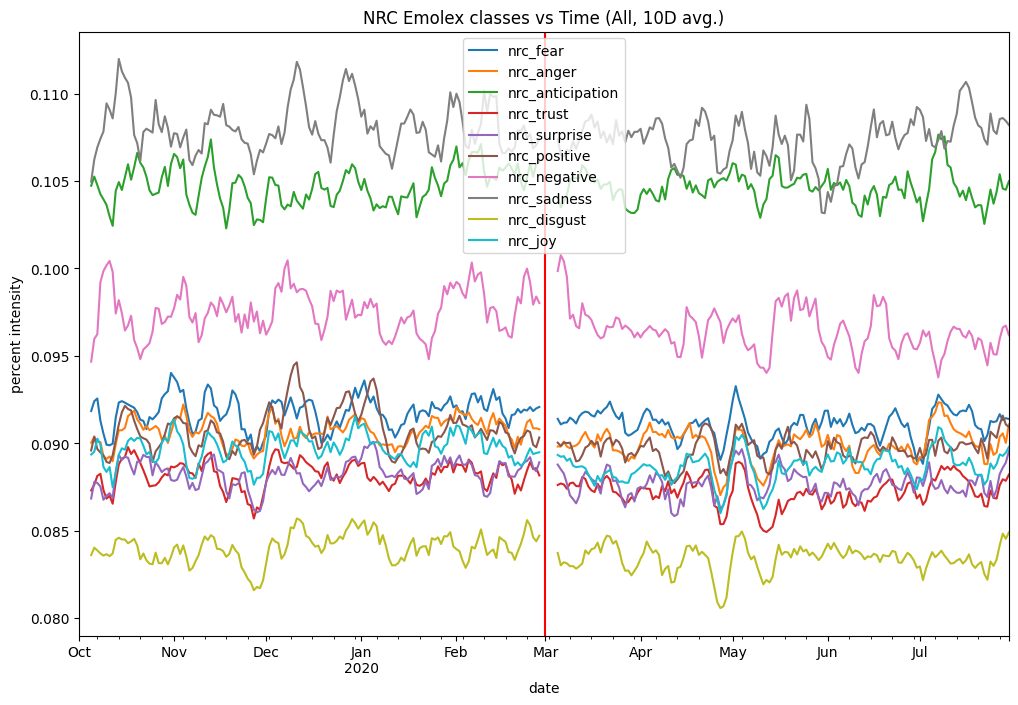

In [378]:
ax = resamp10D[["nrc_fear", "nrc_anger", "nrc_anticipation", "nrc_trust", "nrc_surprise", "nrc_positive", "nrc_negative", "nrc_sadness", "nrc_disgust", "nrc_joy"]].rolling(5).mean().plot(ylabel="percent intensity", title="NRC Emolex classes vs Time (All, 10D avg.)")
ax.axvline(pandemicStart, 0., 1., color="red")
ax.get_figure().savefig("NRC.png",facecolor="white")
ax

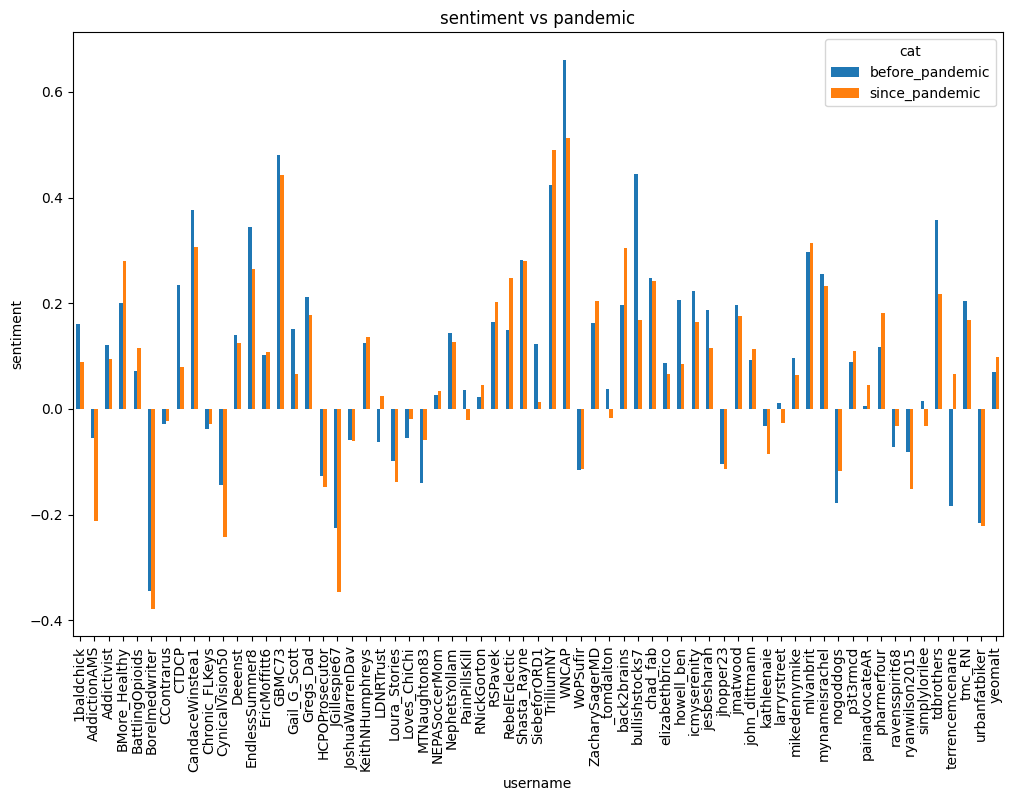

In [379]:
userbf = df.groupby(["username","cat"])["sent"].mean()
# print(userbf)
# print(userbf['username'])
# colors = {'since_pandemic':'red', 'before_pandemic':'green'}
# fig, ax = plt.subplots()
# ax.bar(userbf['username'], userbf['sent'], c=userbf['cat'].map(colors))
ax = userbf.unstack('cat').plot.bar(title="sentiment vs pandemic", xlabel="username", ylabel="sentiment")
ax.get_figure().savefig("sentiment_pandemic.png",facecolor="white")

In [380]:
xs = []
ys = []
for i in range(1000):
    THRESHOLD = i/1000.
    nLess = 0
    nOther = 0
    for k, v in userbf.items():
        if k[1] == "since_pandemic": continue
        since = userbf[k[0], "since_pandemic"]
        before = v
        
        #discarding neural users increases the percentage.
        if abs(since) < THRESHOLD and abs(before) < THRESHOLD : continue
        if since < before:
            nLess += 1
        else: nOther += 1
    
    xs.append(THRESHOLD)
    if (nLess+nOther) == 0: percentage = 0
    else: percentage = nLess/(nLess+nOther)

    ys.append(percentage)

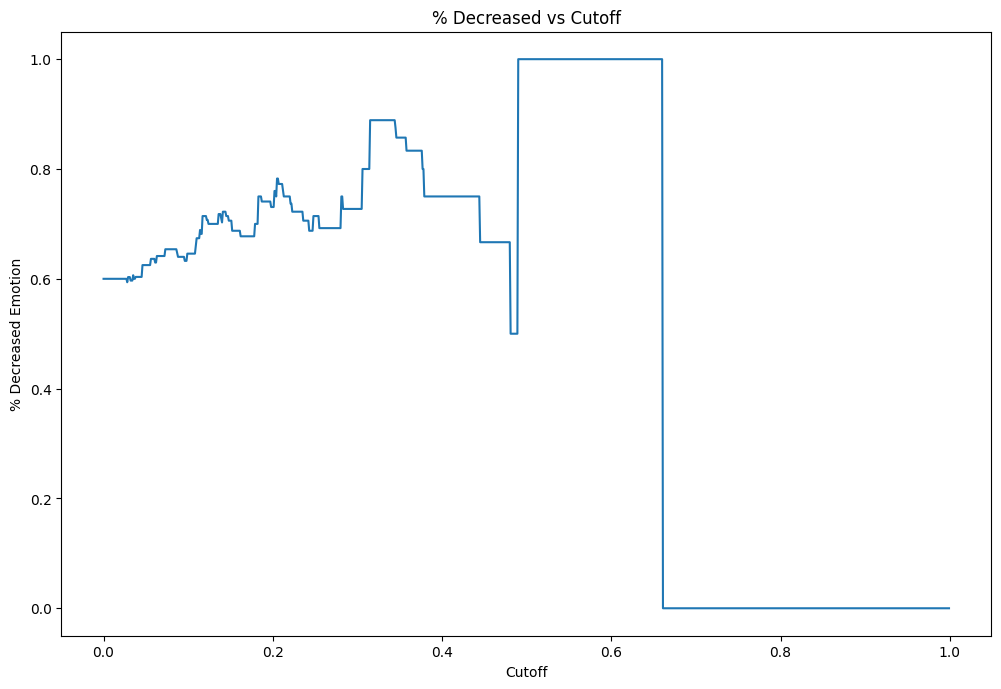

In [381]:
plt.xlabel("Cutoff")
plt.ylabel("% Decreased Emotion")
plt.title("% Decreased vs Cutoff")
plt.plot(xs, ys)

<AxesSubplot:title={'center':'sentiment vs pandemic'}, xlabel='pandemic', ylabel='sentiment'>

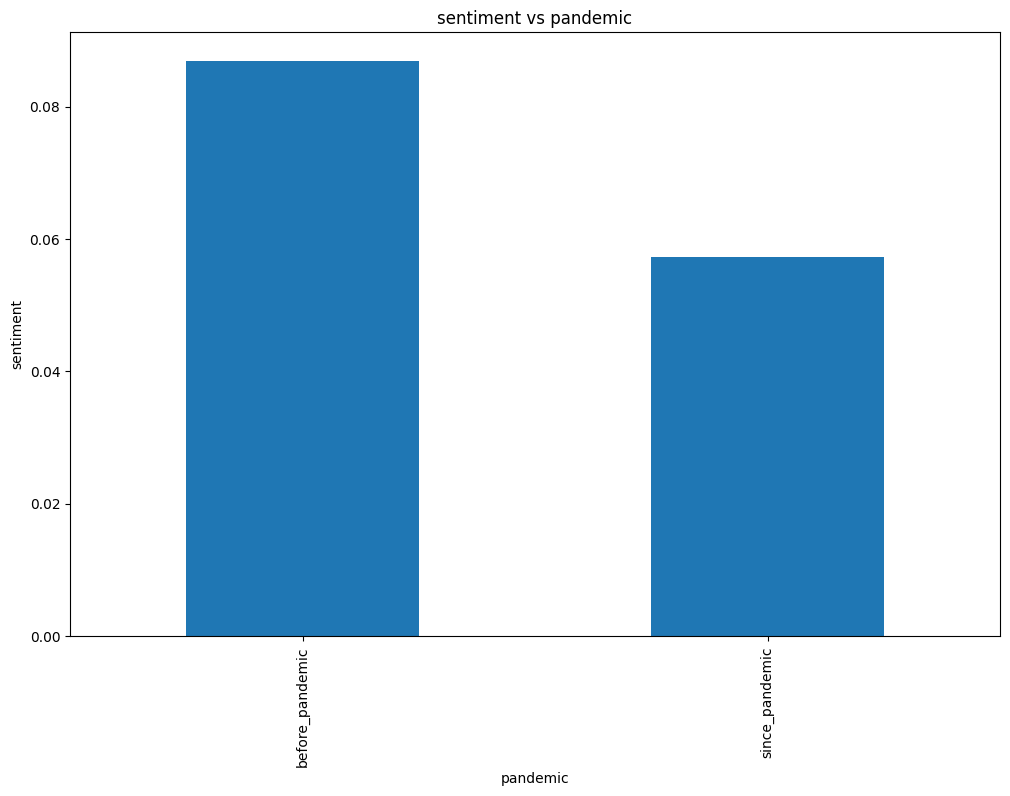

In [382]:
catbf = df.groupby(["cat"])["sent"].mean()
catbf.plot.bar(title="sentiment vs pandemic", xlabel="pandemic", ylabel="sentiment")

In [383]:
df.groupby(["cat"])["sent"].std()

cat
before_pandemic    0.506530
since_pandemic     0.508492
Name: sent, dtype: float64

In [384]:
df["date"].values[-1]-df["date"].values[0]

numpy.timedelta64(193578000000000,'ns')

In [385]:
#sentimentbycat = df.groupby(["cat"])#.groupby(["cat"])#["sent"]
#sentimentbycat[sentimentbycat["cat"] == "before_pandemic"] - sentimentbycat[sentimentbycat["cat"] == "before_pandemic"] #sentimentbycat["since_pandemic"]

In [386]:
userbf.head()

username      cat            
1baldchick    before_pandemic    0.161513
              since_pandemic     0.088141
AddictionAMS  before_pandemic   -0.055001
              since_pandemic    -0.211706
Addictivist   before_pandemic    0.121611
Name: sent, dtype: float64

In [387]:
usernamecatdf = userbf.unstack('cat')
usercatdiff = usernamecatdf["before_pandemic"]-usernamecatdf["since_pandemic"]
usercatdiff

username
1baldchick         0.073372
AddictionAMS       0.156705
Addictivist        0.027762
BMore_Healthy     -0.079462
BattlingOpioids   -0.043734
                     ...   
tdbrothers         0.140079
terrencemcenane   -0.248248
tmc_RN             0.034908
urbanfatbiker      0.004169
yeomalt           -0.029515
Length: 65, dtype: float64

In [388]:
diff_mean = usercatdiff.mean()
diff_mean

0.01816678942703135

In [389]:
diff_std = usercatdiff.std()
diff_std

0.07773879519428045

In [390]:
#P(x<Z) = 0.59239

In [391]:
n = usercatdiff.count()
n

65

In [392]:
from math import sqrt

In [393]:
# low_conf = diff_mean - Z * (diff_std/sqrt(n)) # lower limit of the confidence interval
# 0 = diff_mean - Z * (diff_std/sqrt(n)
# diff_mean = Z * (diff_std/sqrt(n)
# diff_mean / (diff_std/sqrt(n) = Z
z = diff_mean / (diff_std/sqrt(n))
z

1.8840700895061941

In [394]:
import scipy.stats as st

In [395]:
pval = st.norm.cdf(z)
pval

0.97022225228148

In [396]:
usercatdiff.median()

0.01763878470970079

In [397]:
import seaborn as sns
import numpy as np

In [398]:
usercatdiff.head()

username
1baldchick         0.073372
AddictionAMS       0.156705
Addictivist        0.027762
BMore_Healthy     -0.079462
BattlingOpioids   -0.043734
dtype: float64

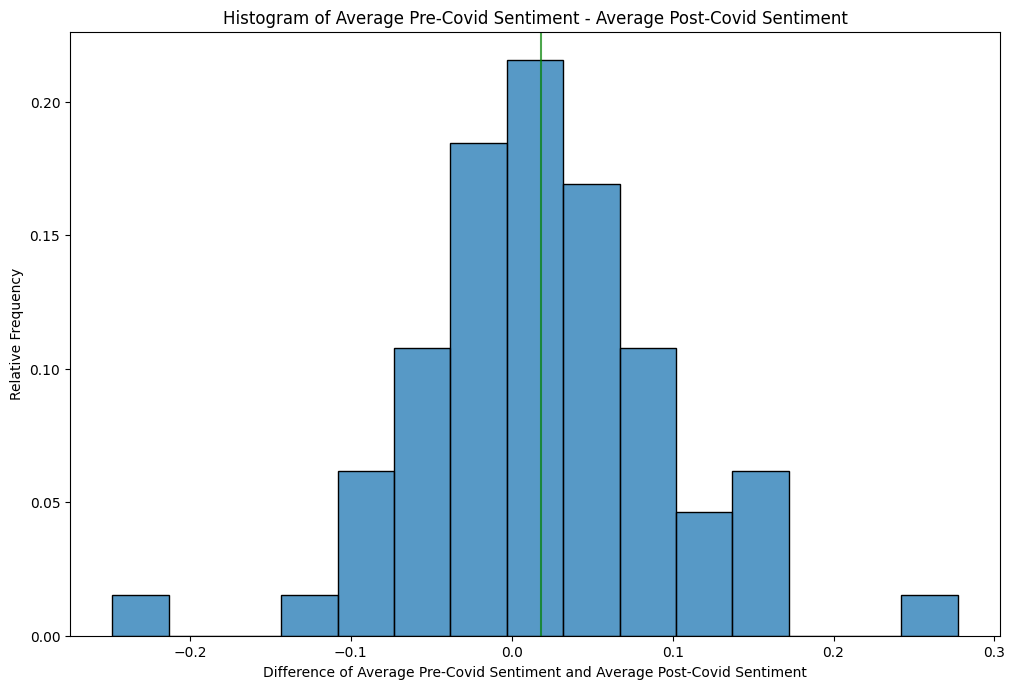

In [399]:
#usercatdiff.plot(kind='hist', normed=True, bins=20, stacked=False, alpha=.5)
#sns.distplot(usercatdiff, hist=True, kde=False, norm_hist=True, bins=np.linspace(-.5, .5, 20), color = 'darkblue')
fig = sns.histplot(data=usercatdiff, stat="probability", bins=15)
fig.axvline(x=diff_mean, ymin=0, ymax=1, color="green", alpha=.7)
fig.set_title("Histogram of Average Pre-Covid Sentiment - Average Post-Covid Sentiment")
fig.set(xlabel="Difference of Average Pre-Covid Sentiment and Average Post-Covid Sentiment", ylabel="Relative Frequency")
fig.figure.savefig("diffhist.png",facecolor="white")